## 문제 2
풍속 : 10, 20, 30, 40, 50, 60, 70, 80  
힘 : 25, 70, 380, 550, 610, 1220, 830, 1450

### 2. (1) 단순선형회귀분석

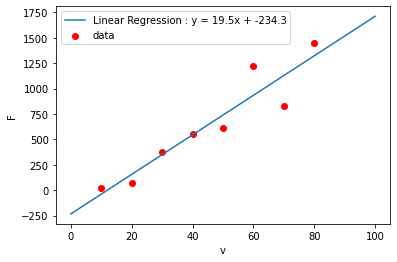

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 변수 설정
v = np.array([10,20,30,40,50,60,70,80])
F = np.array([25,70,380,550,610,1220,830,1450])

#  LR 함수 만들기
def LR(X,Y) :
    length = len(X)
    newX = np.stack([X, np.ones(length)], axis = 1)
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(newX.T, newX)), newX.T), Y)

# LR plot 하기
a, b = LR(v,F)[0], LR(v, F)[1]
domain = np.linspace(0,100,1000)
plt.plot(domain, domain * a + b, label = f"Linear Regression : y = {a:.1f}x + {b:.1f}" )
# 점 그리기
plt.scatter(v,F, color = "red", label = "data")
plt.xlabel('v')
plt.ylabel('F')
plt.legend()
plt.show()

In [2]:
print(f"v = 0 일때, F = {b}")

v = 0 일때, F = -234.28571428571405


$v=0$일 때 $F$값이 음수인 것은 물리적으로 합당하지 않다.

### 2.(2) 멱방정식 곡선

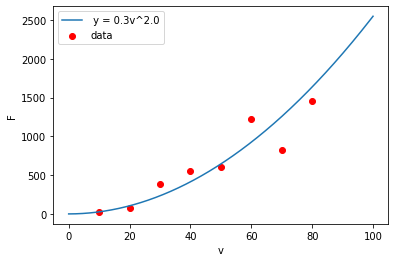

In [3]:
import numpy as np

logv = np.log(v)
logF = np.log(F)

# LR plot 하기
c1, c2 = LR(logv,logF)[0], np.exp(LR(logv, logF)[1])
domain = np.linspace(0,100,1000)
plt.plot(domain, c2 * (domain ** c1), label = f" y = {c2:.1f}v^{c1:.1f}" )
# 점 그리기
plt.scatter(v,F, color = "red", label = "data")
plt.xlabel('v')
plt.ylabel('F')
plt.legend()
plt.show()

$F = cv^2$이 합당하다.